<center>
<img src="img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Автор материала: Екатерина Демидова, Data Scientist @ Segmento <br>


Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>



In [14]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### УБЕДИТЕСЬ, ЧТО ВЕТКА ВАША! Запустите клетку ниже, чтобы посмотреть на какой ветке вы находитесь

In [15]:
! git branch

* master


## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [16]:
df = pd.read_csv('data/howpop_train.csv')

In [17]:
df.shape

(134137, 17)

In [18]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [19]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [21]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/66888/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [22]:
# настройка внешнего вида графиков в seaborn

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [23]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [24]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [38]:
print('За март 2016 года ', len(df[df['year']==2016][df['month']==3]))
print('За март 2015 года ', len(df[df['year']==2015][df['month']==3]))
print('За апрель 2015 года ', len(df[df['year']==2015][df['month']==4]))
print('За апрель 2016 года ', len(df[df['year']==2016][df['month']==4]))

За март 2016 года  2115
За март 2015 года  2189
За апрель 2015 года  2110
За апрель 2016 года  1910


c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


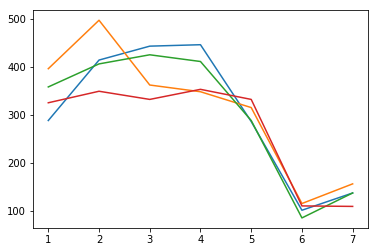

In [49]:
plt.plot(df[df['year']==2016][df['month']==3].groupby('dayofweek').size())
plt.plot(df[df['year']==2015][df['month']==3].groupby('dayofweek').size())
plt.plot(df[df['year']==2015][df['month']==4].groupby('dayofweek').size())
plt.plot(df[df['year']==2016][df['month']==4].groupby('dayofweek').size())
plt.show()

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


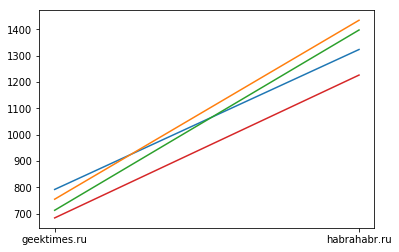

In [50]:
plt.plot(df[df['year']==2016][df['month']==3].groupby('domain').size())
plt.plot(df[df['year']==2015][df['month']==3].groupby('domain').size())
plt.plot(df[df['year']==2015][df['month']==4].groupby('domain').size())
plt.plot(df[df['year']==2016][df['month']==4].groupby('domain').size())
plt.show()

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


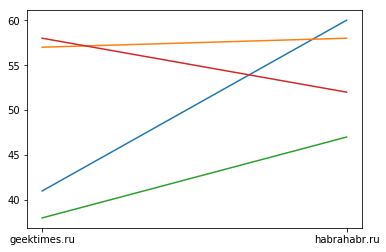

In [51]:
plt.plot(df[df['year']==2016][df['month']==3][df['dayofweek']==6].groupby('domain').size())
plt.plot(df[df['year']==2015][df['month']==3][df['dayofweek']==6].groupby('domain').size())
plt.plot(df[df['year']==2015][df['month']==4][df['dayofweek']==6].groupby('domain').size())
plt.plot(df[df['year']==2016][df['month']==4][df['dayofweek']==6].groupby('domain').size())
plt.show()

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

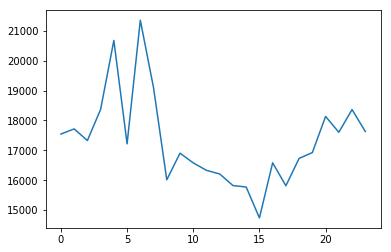

In [70]:
plt.plot(df.groupby('hour')['views'].sum()/df.groupby('hour')['url'].size())
plt.show()

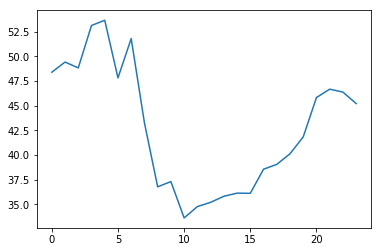

In [71]:
plt.plot(df.groupby('hour')['comments'].sum()/df.groupby('hour')['url'].size())
plt.show()

In [82]:
df.iloc[df[df['domain']=='geektimes.ru']['comments'].idxmax()]

url            https://geektimes.ru/post/123157/
domain                              geektimes.ru
post_id                                   123157
published                    2011-07-01 02:35:00
author                                  @Dottore
flow                                         NaN
polling                                    False
content_len                                 2158
title           Как раздавать инвайты на Google+
comments                                    2266
favs                                          24
views                                      15300
votes_plus                                   226
votes_minus                                   55
year                                        2011
month                                          7
dayofweek                                      5
hour                                           2
Name: 38763, dtype: object

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?